In [3]:
# --- DEBUG STANDALONE - Investigando problema MPIIGaze ---
import os
import cv2
import numpy as np

print("🔍 MODO DEBUG - Investigando o problema MPIIGaze...")

# Configurações
CAMINHO_BASE = '..'
MPIIGAZE_PATH_ORIGINAL = os.path.join(CAMINHO_BASE, 'mpiigaze_real', 'MPIIGaze', 'Data', 'Original')
MPIIGAZE_PATH_NORMALIZED = os.path.join(CAMINHO_BASE, 'mpiigaze_real', 'MPIIGaze', 'Data', 'Normalized')

print(f"Path Original: {MPIIGAZE_PATH_ORIGINAL}")
print(f"Existe Original? {os.path.exists(MPIIGAZE_PATH_ORIGINAL)}")
print(f"Path Normalized: {MPIIGAZE_PATH_NORMALIZED}")
print(f"Existe Normalized? {os.path.exists(MPIIGAZE_PATH_NORMALIZED)}")

# Verificar qual pasta usar
if os.path.exists(MPIIGAZE_PATH_ORIGINAL):
    MPIIGAZE_PATH = MPIIGAZE_PATH_ORIGINAL
    data_type = "Original"
elif os.path.exists(MPIIGAZE_PATH_NORMALIZED):
    MPIIGAZE_PATH = MPIIGAZE_PATH_NORMALIZED
    data_type = "Normalized"
else:
    print("❌ ERRO: Nenhuma pasta do MPIIGaze encontrada!")
    exit()

print(f"\n✅ Usando: {data_type} - {MPIIGAZE_PATH}")

# Listar participantes
participants = [p for p in os.listdir(MPIIGAZE_PATH) if os.path.isdir(os.path.join(MPIIGAZE_PATH, p))]
print(f"Participantes encontrados: {participants[:5]}...")

if not participants:
    print("❌ Nenhum participante encontrado!")
    exit()

# Investigar primeiro participante
first_participant = participants[0]
participant_path = os.path.join(MPIIGAZE_PATH, first_participant)
print(f"\n🔍 Investigando participante: {first_participant}")

# Listar conteúdo do participante
participant_contents = os.listdir(participant_path)
print(f"Conteúdo: {participant_contents[:10]}...")

if data_type == "Original":
    # Para dados Original: procurar dias
    days = [d for d in participant_contents if d.startswith('day') and os.path.isdir(os.path.join(participant_path, d))]
    print(f"Dias encontrados: {days[:5]}...")
    
    if days:
        first_day = days[0]
        day_path = os.path.join(participant_path, first_day)
        print(f"\n🔍 Investigando dia: {first_day}")
        
        # Verificar annotation.txt
        annotation_path = os.path.join(day_path, 'annotation.txt')
        print(f"annotation.txt existe? {os.path.exists(annotation_path)}")
        
        if os.path.exists(annotation_path):
            # Ler primeiras linhas
            with open(annotation_path, 'r') as f:
                lines = f.readlines()[:3]
            
            print(f"Primeiras 3 linhas do annotation.txt:")
            for i, line in enumerate(lines):
                print(f"  {i+1}: {line.strip()}")
            
            # Verificar se imagens existem
            if lines:
                first_line = lines[0].strip()
                parts = first_line.split()
                if len(parts) > 0:
                    image_name = parts[0]
                    image_path = os.path.join(day_path, image_name)
                    print(f"\nPrimeira imagem: {image_name}")
                    print(f"Existe? {os.path.exists(image_path)}")
        else:
            print("❌ annotation.txt não encontrado!")

elif data_type == "Normalized":
    # Para dados Normalized: procurar arquivos .mat
    mat_files = [f for f in participant_contents if f.endswith('.mat')]
    print(f"Arquivos .mat encontrados: {mat_files[:5]}...")
    
    if mat_files:
        # Tentar carregar primeiro arquivo .mat
        from scipy.io import loadmat
        
        first_mat = mat_files[0]
        mat_path = os.path.join(participant_path, first_mat)
        print(f"\n🔍 Investigando arquivo .mat: {first_mat}")
        
        try:
            mat_data = loadmat(mat_path)
            print(f"Chaves no .mat: {list(mat_data.keys())}")
            
            if 'data' in mat_data:
                data = mat_data['data'][0, 0]
                print(f"Estrutura do data: {data.dtype.names if hasattr(data, 'dtype') else 'Formato desconhecido'}")
                
                if hasattr(data, 'dtype') and 'right' in data.dtype.names:
                    eye_data = data['right'][0, 0]
                    print(f"Estrutura eye_data: {eye_data.dtype.names if hasattr(eye_data, 'dtype') else 'Formato desconhecido'}")
                    
                    if hasattr(eye_data, 'dtype') and 'image' in eye_data.dtype.names:
                        images = eye_data['image']
                        gazes = eye_data['gaze']
                        print(f"Imagens shape: {images.shape}")
                        print(f"Gazes shape: {gazes.shape}")
                        print(f"Primeira imagem shape: {images[0].shape if len(images) > 0 else 'Vazio'}")
                        print(f"Primeiro gaze: {gazes[0] if len(gazes) > 0 else 'Vazio'}")
                        
        except Exception as e:
            print(f"❌ Erro ao carregar .mat: {e}")

print(f"\n📊 DIAGNÓSTICO COMPLETO:")
print(f"  • Tipo de dados: {data_type}")
print(f"  • Caminho válido: ✅")
print(f"  • Participantes: {len(participants)}")

if data_type == "Original":
    print(f"  • Formato: Imagens .jpg + annotation.txt")
    print(f"  • Próximo passo: Corrigir parser para dados Original")
else:
    print(f"  • Formato: Arquivos .mat pré-processados")
    print(f"  • Próximo passo: Usar dados Normalized (mais fácil)")

print("\n✅ Debug concluído!")

🔍 MODO DEBUG - Investigando o problema MPIIGaze...
Path Original: ../mpiigaze_real/MPIIGaze/Data/Original
Existe Original? True
Path Normalized: ../mpiigaze_real/MPIIGaze/Data/Normalized
Existe Normalized? True

✅ Usando: Original - ../mpiigaze_real/MPIIGaze/Data/Original
Participantes encontrados: ['p12', 'p04', 'p01', 'p11', 'p06']...

🔍 Investigando participante: p12
Conteúdo: ['day05', 'day06', 'Calibration', 'day02', 'day01', 'day03', 'day07', 'day04']...
Dias encontrados: ['day05', 'day06', 'day02', 'day01', 'day03']...

🔍 Investigando dia: day05
annotation.txt existe? True
Primeiras 3 linhas do annotation.txt:
  1: 594 424 610 413 631 413 648 425 630 431 611 431 742 425 760 412 781 412 799 423 781 430 761 430 119 329 117.161980 68.938965 8.984315 -0.198145 0.328888 0.002619 18.080992 32.076969 424.472809 -13.349829 33.060829 435.135590 49.511810 31.093113 413.809998
  2: 593 431 610 422 630 423 646 433 628 437 610 437 738 435 755 425 775 424 792 434 775 439 756 439 978 784 -74.8

In [6]:
# --- Célula 2: MPIIGaze com Auto-Threshold ---
print("Processando dados MPIIGaze com threshold automático...")

from scipy.io import loadmat

def preprocess_mpiigaze_image(img):
    """Preprocessa imagem do MPIIGaze Normalized"""
    img_resized = cv2.resize(img, IMG_SIZE)
    if len(img_resized.shape) == 2:
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    img_normalized = img_resized.astype('float32') / 255.0
    return img_normalized

# Configuração
MPIIGAZE_PATH = os.path.join(CAMINHO_BASE, 'mpiigaze_real', 'MPIIGaze', 'Data', 'Normalized')
output_dir_sequences = 'processed_sequences_mpiigaze_normalized'
MODELO_SALVO = os.path.join(CAMINHO_BASE, 'models', 'mpiigaze_attention_model_normalized.keras')

print(f"Carregando dados: {MPIIGAZE_PATH}")

# Carregar dados e calcular ângulos
all_images = []
all_gaze_angles = []
processed_files = 0

for participant_dir in sorted(os.listdir(MPIIGAZE_PATH)):
    if processed_files >= TARGET_FILES:
        break
    
    participant_path = os.path.join(MPIIGAZE_PATH, participant_dir)
    if not os.path.isdir(participant_path):
        continue
    
    print(f"Processando: {participant_dir}")
    
    for day_file in sorted(os.listdir(participant_path)):
        if processed_files >= TARGET_FILES:
            break
        if not day_file.endswith('.mat'):
            continue
        
        mat_path = os.path.join(participant_path, day_file)
        try:
            mat_data = loadmat(mat_path)
            data = mat_data['data'][0, 0]
            eye_data = data['right'][0, 0]
            images = eye_data['image']
            gazes = eye_data['gaze']
            
            for img, gaze in zip(images, gazes):
                img_normalized = preprocess_mpiigaze_image(img)
                pitch, yaw = gaze[0], gaze[1]
                angle = np.sqrt(pitch**2 + yaw**2) * 180 / np.pi
                
                all_images.append(img_normalized)
                all_gaze_angles.append(angle)
            
            processed_files += 1
            if processed_files % 10 == 0:
                print(f"  {processed_files} arquivos, {len(all_images)} imagens")
                
        except Exception as e:
            print(f"Erro: {e}")
            continue

print(f"Total carregado: {len(all_images)} imagens")

# Analisar distribuição dos ângulos
angles_array = np.array(all_gaze_angles)
print(f"\nEstatísticas dos ângulos:")
print(f"  Mín: {angles_array.min():.1f}°")
print(f"  Máx: {angles_array.max():.1f}°")
print(f"  Média: {angles_array.mean():.1f}°")
print(f"  Mediana: {np.median(angles_array):.1f}°")

# Testar diferentes thresholds
print(f"\n🎯 Testando thresholds:")
test_thresholds = [5, 8, 10, 12, 15, 20]
best_threshold = None
best_balance = 0

for threshold in test_thresholds:
    labels = [1 if angle <= threshold else 0 for angle in all_gaze_angles]
    unique, counts = np.unique(labels, return_counts=True)
    
    if len(unique) == 2:
        balance = min(counts) / max(counts)  # Quanto mais próximo de 1, melhor
        class_0_pct = (counts[0] / len(labels)) * 100 if unique[0] == 0 else 0
        class_1_pct = (counts[1] / len(labels)) * 100 if len(counts) > 1 else 0
        
        print(f"  {threshold:2d}°: Classe 0: {class_0_pct:4.1f}%, Classe 1: {class_1_pct:4.1f}% (balance: {balance:.2f})")
        
        if balance > best_balance and balance > 0.2:  # Pelo menos 20% da classe minoritária
            best_balance = balance
            best_threshold = threshold
    else:
        pct = 100.0
        print(f"  {threshold:2d}°: Apenas classe {unique[0]}: {pct:4.1f}%")

# Usar melhor threshold encontrado
if best_threshold is not None:
    final_threshold = best_threshold
    print(f"\n✅ Melhor threshold: {final_threshold}° (balance: {best_balance:.2f})")
else:
    final_threshold = 10  # Fallback
    print(f"\n⚠️ Usando threshold padrão: {final_threshold}°")

# Aplicar threshold final
final_labels = [1 if angle <= final_threshold else 0 for angle in all_gaze_angles]
labels_array = np.array(final_labels)
images_array = np.array(all_images)

# Verificar distribuição final
unique_labels, counts = np.unique(labels_array, return_counts=True)
distribution = dict(zip(unique_labels, counts))
print(f"\nDistribuição final com {final_threshold}°: {distribution}")

for label, count in distribution.items():
    percentage = (count / len(labels_array)) * 100
    print(f" Classe {label}: {count} amostras ({percentage:.1f}%)")

# Calcular pesos das classes
if len(unique_labels) >= 2:
    class_weights = compute_class_weight('balanced', classes=unique_labels, y=labels_array)
    class_weight_dict = dict(zip(unique_labels, class_weights))
    print(f"\nPesos das classes: {class_weight_dict}")
else:
    class_weight_dict = {0: 1.0, 1: 1.0}
    print(f"\nUsando pesos padrão: {class_weight_dict}")

print("✅ Dados processados com threshold otimizado!")

Processando dados MPIIGaze com threshold automático...
Carregando dados: ../mpiigaze_real/MPIIGaze/Data/Normalized
Processando: p00
  10 arquivos, 8354 imagens
  20 arquivos, 14763 imagens
  30 arquivos, 22882 imagens
Processando: p01
  40 arquivos, 30471 imagens
  50 arquivos, 33445 imagens
  60 arquivos, 37221 imagens
  70 arquivos, 39497 imagens
  80 arquivos, 42148 imagens
  90 arquivos, 46269 imagens
  100 arquivos, 51820 imagens
Total carregado: 51820 imagens

Estatísticas dos ângulos:
  Mín: 0.1°
  Máx: 23.5°
  Média: 11.7°
  Mediana: 12.0°

🎯 Testando thresholds:
   5°: Classe 0: 91.7%, Classe 1:  8.3% (balance: 0.09)
   8°: Classe 0: 77.8%, Classe 1: 22.2% (balance: 0.29)
  10°: Classe 0: 64.5%, Classe 1: 35.5% (balance: 0.55)
  12°: Classe 0: 49.6%, Classe 1: 50.4% (balance: 0.98)
  15°: Classe 0: 25.3%, Classe 1: 74.7% (balance: 0.34)
  20°: Classe 0:  1.8%, Classe 1: 98.2% (balance: 0.02)

✅ Melhor threshold: 12° (balance: 0.98)

Distribuição final com 12°: {np.int64(0): np

In [7]:
# Limpar sequências antigas
if os.path.exists(output_dir_sequences):
    shutil.rmtree(output_dir_sequences)
    print("Lotes antigos removidos.")

# --- 3. Agrupar em sequências e salvar em lotes ---
print("Criando sequências de dados em lotes...")

if not os.path.exists(output_dir_sequences):
    os.makedirs(output_dir_sequences)

# Armazena os dados do lote atual
current_batch_data = []
current_batch_labels = []
batch_counter = 0

print("IMPORTANTE: Usando janelas não-sobrepostas para evitar data leakage.")

# Usar step=TIME_WINDOW para evitar sobreposição
total_possible_sequences = (len(images_array) - TIME_WINDOW + 1)
non_overlapping_sequences = len(images_array) // TIME_WINDOW
print(f"Sequências possíveis com sobreposição: {total_possible_sequences}")
print(f"Sequências sem sobreposição: {non_overlapping_sequences}")

sequence_count = 0

# Mudança crítica: step=TIME_WINDOW em vez de step=1
for i in range(0, len(images_array) - TIME_WINDOW + 1, TIME_WINDOW):
    if i + TIME_WINDOW <= len(images_array):
        sequence_images = images_array[i:i + TIME_WINDOW]
        window_labels = labels_array[i:i + TIME_WINDOW]
        
        # Verificar se a janela tem rótulos válidos
        if len(window_labels) == TIME_WINDOW:
            # CORRIGIDO: Threshold mais flexível (0.6 em vez de 0.9)
            sequence_label = 1 if np.mean(window_labels) > 0.6 else 0
            
            current_batch_data.append(sequence_images)
            current_batch_labels.append(sequence_label)
            sequence_count += 1
            
            if sequence_count % 500 == 0:
                print(f"Criadas {sequence_count} sequências...")
        
        # Quando o lote atual atingir o tamanho definido, salve-o
        if len(current_batch_data) == BATCH_SIZE_SEQUENCE or i >= len(images_array) - TIME_WINDOW:
            if len(current_batch_data) > 0:  # Só salva se tiver dados
                print(f"Salvando lote {batch_counter} com {len(current_batch_data)} amostras.")
                X_batch = np.array(current_batch_data)
                y_batch = np.array(current_batch_labels)
                
                # Verificar distribuição do lote atual
                unique_batch, counts_batch = np.unique(y_batch, return_counts=True)
                print(f" Distribuição do lote {batch_counter}: {dict(zip(unique_batch, counts_batch))}")
                
                # Salve os arrays em arquivos .npy
                np.save(os.path.join(output_dir_sequences, f'X_batch_{batch_counter}.npy'), X_batch)
                np.save(os.path.join(output_dir_sequences, f'y_batch_{batch_counter}.npy'), y_batch)
                
                # Limpe a memória para o próximo lote
                current_batch_data = []
                current_batch_labels = []
                batch_counter += 1

print(f"Processamento em lotes concluído. {batch_counter} lotes criados.")
print(f"Total de sequências criadas: {sequence_count}")

# Verificar distribuição geral das sequências
if batch_counter > 0:
    all_sequence_labels = []
    for b in range(batch_counter):
        y_batch = np.load(os.path.join(output_dir_sequences, f'y_batch_{b}.npy'))
        all_sequence_labels.extend(y_batch)
    
    unique_seq, counts_seq = np.unique(all_sequence_labels, return_counts=True)
    seq_distribution = dict(zip(unique_seq, counts_seq))
    print(f"Distribuição final das sequências: {seq_distribution}")
    
    # Calcular pesos das classes para sequências
    sequence_class_weights = compute_class_weight('balanced', classes=unique_seq, y=all_sequence_labels)
    sequence_class_weight_dict = dict(zip(unique_seq, sequence_class_weights))
    print(f"Pesos das classes para sequências: {sequence_class_weight_dict}")

print("✅ Sequências criadas com sucesso!")

Criando sequências de dados em lotes...
IMPORTANTE: Usando janelas não-sobrepostas para evitar data leakage.
Sequências possíveis com sobreposição: 51811
Sequências sem sobreposição: 5182
Criadas 500 sequências...
Criadas 1000 sequências...
Salvando lote 0 com 1000 amostras.
 Distribuição do lote 0: {np.int64(0): np.int64(746), np.int64(1): np.int64(254)}
Criadas 1500 sequências...
Criadas 2000 sequências...
Salvando lote 1 com 1000 amostras.
 Distribuição do lote 1: {np.int64(0): np.int64(717), np.int64(1): np.int64(283)}
Criadas 2500 sequências...
Criadas 3000 sequências...
Salvando lote 2 com 1000 amostras.
 Distribuição do lote 2: {np.int64(0): np.int64(737), np.int64(1): np.int64(263)}
Criadas 3500 sequências...
Criadas 4000 sequências...
Salvando lote 3 com 1000 amostras.
 Distribuição do lote 3: {np.int64(0): np.int64(908), np.int64(1): np.int64(92)}
Criadas 4500 sequências...
Criadas 5000 sequências...
Salvando lote 4 com 1000 amostras.
 Distribuição do lote 4: {np.int64(0): np

In [8]:
# --- 4. Divisão dos dados em treino, validação e teste ---
print("Dividindo dados em treino, validação e teste...")

# Carregar a lista de todos os arquivos de lote
batch_files = sorted([f for f in os.listdir(output_dir_sequences) if f.startswith('X_batch_')])
total_batches = len(batch_files)
print(f"Arquivos de lote encontrados: {batch_files}")

# Verificar se existem lotes suficientes para divisão
if total_batches < 3:
    print(f"AVISO: Apenas {total_batches} lotes encontrados. Isso pode não ser suficiente para uma divisão adequada.")
    if total_batches == 1:
        print("Com apenas 1 lote, todo o dataset será usado para treino.")
        train_batches_indices = np.array([0])
        val_batches_indices = np.array([])
        test_batches_indices = np.array([])
    elif total_batches == 2:
        print("Com apenas 2 lotes, usando 1 para treino e 1 para validação.")
        train_batches_indices = np.array([0])
        val_batches_indices = np.array([1])
        test_batches_indices = np.array([])
else:
    # Crie uma lista de índices para cada lote
    batch_indices = np.arange(total_batches)
    
    # Divida os índices dos lotes em treino, validação e teste
    train_batches_indices, temp_batches_indices = train_test_split(
        batch_indices, test_size=0.3, random_state=42
    )
    val_batches_indices, test_batches_indices = train_test_split(
        temp_batches_indices, test_size=0.5, random_state=42
    )

print(f"Total de lotes: {total_batches}")
print(f"Lotes para treino: {len(train_batches_indices)} ({train_batches_indices})")
print(f"Lotes para validação: {len(val_batches_indices)} ({val_batches_indices})")
print(f"Lotes para teste: {len(test_batches_indices)} ({test_batches_indices})")

# Verificar a distribuição dos dados em cada conjunto
def check_data_distribution(batch_indices_list, set_name):
    if len(batch_indices_list) == 0:
        print(f"{set_name}: Vazio")
        return
    
    total_samples = 0
    all_labels = []
    
    for idx in batch_indices_list:
        y_batch = np.load(os.path.join(output_dir_sequences, f'y_batch_{idx}.npy'))
        total_samples += len(y_batch)
        all_labels.extend(y_batch)
    
    if len(all_labels) > 0:
        unique_labels, counts = np.unique(all_labels, return_counts=True)
        distribution = dict(zip(unique_labels, counts))
        percentages = {k: f"{(v/total_samples)*100:.1f}%" for k, v in distribution.items()}
        
        print(f"{set_name}: {total_samples} amostras")
        print(f" Distribuição: {distribution}")
        print(f" Percentuais: {percentages}")
    else:
        print(f"{set_name}: Sem dados")

print("\n--- Distribuição dos dados por conjunto ---")
check_data_distribution(train_batches_indices, "TREINO")
check_data_distribution(val_batches_indices, "VALIDAÇÃO")
check_data_distribution(test_batches_indices, "TESTE")

print("✅ Dados divididos com sucesso!")

Dividindo dados em treino, validação e teste...
Arquivos de lote encontrados: ['X_batch_0.npy', 'X_batch_1.npy', 'X_batch_2.npy', 'X_batch_3.npy', 'X_batch_4.npy', 'X_batch_5.npy']
Total de lotes: 6
Lotes para treino: 4 ([5 2 4 3])
Lotes para validação: 1 ([0])
Lotes para teste: 1 ([1])

--- Distribuição dos dados por conjunto ---
TREINO: 3182 amostras
 Distribuição: {np.int64(0): np.int64(2703), np.int64(1): np.int64(479)}
 Percentuais: {np.int64(0): '84.9%', np.int64(1): '15.1%'}
VALIDAÇÃO: 1000 amostras
 Distribuição: {np.int64(0): np.int64(746), np.int64(1): np.int64(254)}
 Percentuais: {np.int64(0): '74.6%', np.int64(1): '25.4%'}
TESTE: 1000 amostras
 Distribuição: {np.int64(0): np.int64(717), np.int64(1): np.int64(283)}
 Percentuais: {np.int64(0): '71.7%', np.int64(1): '28.3%'}
✅ Dados divididos com sucesso!


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# --- 5. Gerador de Dados para o Treinamento (Otimizado) ---
def data_generator_optimized(batch_indices_to_use, batch_size):
    """
    Função geradora para carregar dados em mini-lotes para o treinamento.
    """
    while True:
        # Embaralha os índices dos lotes .npy a cada época
        np.random.shuffle(batch_indices_to_use)
        
        for i in batch_indices_to_use:
            # Carrega um lote completo da memória (X_batch, y_batch)
            X_batch = np.load(os.path.join(output_dir_sequences, f'X_batch_{i}.npy'))
            y_batch = np.load(os.path.join(output_dir_sequences, f'y_batch_{i}.npy'))
            
            # Embaralha os dados dentro do lote para evitar dependência de ordem
            indices_in_batch = np.arange(len(X_batch))
            np.random.shuffle(indices_in_batch)
            
            # Divida o lote em mini-lotes para o treinamento
            for start in range(0, len(X_batch), batch_size):
                end = start + batch_size
                X_mini_batch = X_batch[indices_in_batch[start:end]]
                y_mini_batch = y_batch[indices_in_batch[start:end]]
                
                # Use o 'yield' para entregar os mini-lotes para o modelo
                yield X_mini_batch, y_mini_batch

# --- 6. Construir o modelo CNN-LSTM ---
print("\nConstruindo o modelo CNN-LSTM...")

# Carregar sample para definir input_shape
X_sample = np.load(os.path.join(output_dir_sequences, f'X_batch_{train_batches_indices[0]}.npy'))
input_shape = X_sample.shape[1:]
print(f"Input shape: {input_shape}")
print(f"Amostra do batch: {X_sample.shape}")

# Modelo melhorado com mais regularização
model = Sequential([
    # Primeira camada convolucional
    TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Dropout(0.25)),
    
    # Segunda camada convolucional
    TimeDistributed(Conv2D(64, (3, 3), activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Dropout(0.25)),
    
    # Terceira camada convolucional
    TimeDistributed(Conv2D(128, (3, 3), activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(Dropout(0.25)),
    
    # Flatten e LSTM
    TimeDistributed(Flatten()),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=False),
    
    # Camadas densas
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

print("Modelo construído com sucesso!")

# Compilar o modelo com learning rate otimizado
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

model.summary()
print("✅ Modelo compilado com sucesso!")


Construindo o modelo CNN-LSTM...
Input shape: (10, 64, 64, 3)
Amostra do batch: (182, 10, 64, 64, 3)
Modelo construído com sucesso!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_12             │ (None, 10, 62, 62, 32) │           896 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 10, 62, 62, 32) │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 10, 31, 31, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 10, 31, 31, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 10, 29, 29, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 10, 29, 29, 64) │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 10, 14, 14, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 10, 14, 14, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 10, 12, 12,     │        73,856 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 10, 12, 12,     │           512 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 10, 12, 12,     │             0 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_23             │ (None, 10, 18432)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     9,503,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605,697 (36.64 MB)

 Trainable params: 9,605,249 (36.64 MB)

 Non-trainable params: 448 (1.75 KB)

✅ Modelo compilado com sucesso!


In [14]:
# --- 7. Treinamento SIMPLES (sem balanceamento complexo) ---
print("\nIniciando o treinamento do modelo...")

# Calcular steps per epoch
total_train_samples = 0
for i in train_batches_indices:
    y_batch = np.load(os.path.join(output_dir_sequences, f'y_batch_{i}.npy'))
    total_train_samples += len(y_batch)

total_val_samples = 0
if len(val_batches_indices) > 0:
    for i in val_batches_indices:
        y_batch = np.load(os.path.join(output_dir_sequences, f'y_batch_{i}.npy'))
        total_val_samples += len(y_batch)

batch_size = 16
steps_per_epoch = max(1, total_train_samples // batch_size)
validation_steps = max(1, total_val_samples // batch_size) if total_val_samples > 0 else None

print(f"Total samples treino: {total_train_samples}")
print(f"Total samples validação: {total_val_samples}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss' if validation_steps else 'loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss' if validation_steps else 'loss',
        factor=0.5,
        patience=7,
        min_lr=1e-7,
        verbose=1
    )
]

# Usar gerador original simples
train_generator = data_generator_optimized(train_batches_indices, batch_size=batch_size)

if len(val_batches_indices) > 0:
    val_generator = data_generator_optimized(val_batches_indices, batch_size=batch_size)
else:
    val_generator = None

print(f"\n🚀 Iniciando treinamento com gerador simples...")
print(f"⚠️ Dados desbalanceados mas com dropout para regularização")

# Compilar modelo com learning rate menor para estabilidade
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Menor que antes
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Treinamento simples
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,  # Menos épocas para começar
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

print("✅ Treinamento concluído!")

# Resumo dos resultados
final_loss = history.history['loss'][-1]
final_acc = history.history['accuracy'][-1]

if 'val_loss' in history.history:
    final_val_loss = history.history['val_loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"\n📊 Resultados finais:")
    print(f"Loss treino: {final_loss:.4f}")
    print(f"Acurácia treino: {final_acc:.4f}")
    print(f"Loss validação: {final_val_loss:.4f}")
    print(f"Acurácia validação: {final_val_acc:.4f}")
    
    # Verificar se saiu da baseline
    if final_val_acc > 0.6:
        print("✅ Modelo aprendeu! Acurácia acima da baseline!")
    elif final_val_acc > 0.55:
        print("⚠️ Modelo aprendendo. Pode precisar de mais épocas.")
    else:
        print("❌ Modelo ainda na baseline. Verificar dados ou arquitetura.")
else:
    print(f"\n📊 Resultados finais:")
    print(f"Loss treino: {final_loss:.4f}")
    print(f"Acurácia treino: {final_acc:.4f}")
    
    if final_acc > 0.6:
        print("✅ Modelo aprendeu!")
    else:
        print("⚠️ Pode precisar de mais ajustes.")


Iniciando o treinamento do modelo...
Total samples treino: 3182
Total samples validação: 1000
Steps per epoch: 198
Validation steps: 62

🚀 Iniciando treinamento com gerador simples...
⚠️ Dados desbalanceados mas com dropout para regularização
Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.7847 - loss: 0.5317 - val_accuracy: 0.7450 - val_loss: 0.5995 - learning_rate: 5.0000e-04
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.7913 - loss: 0.5131 - val_accuracy: 0.7429 - val_loss: 0.6261 - learning_rate: 5.0000e-04
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.8964 - loss: 0.3363 - val_accuracy: 0.7378 - val_loss: 0.5749 - learning_rate: 5.0000e-04
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.8387 - loss: 0.4455 - val_accuracy: 0.7439 - val_loss: 0.5994 - learning_rate: 5.0000e-04
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.8750 - loss: 0.3739 - val_accuracy: 0.7276 - val_loss: 0.6166


Modelo salvo em: ../models/mpiigaze_attention_model_normalized.keras

Criando gráficos de treinamento...


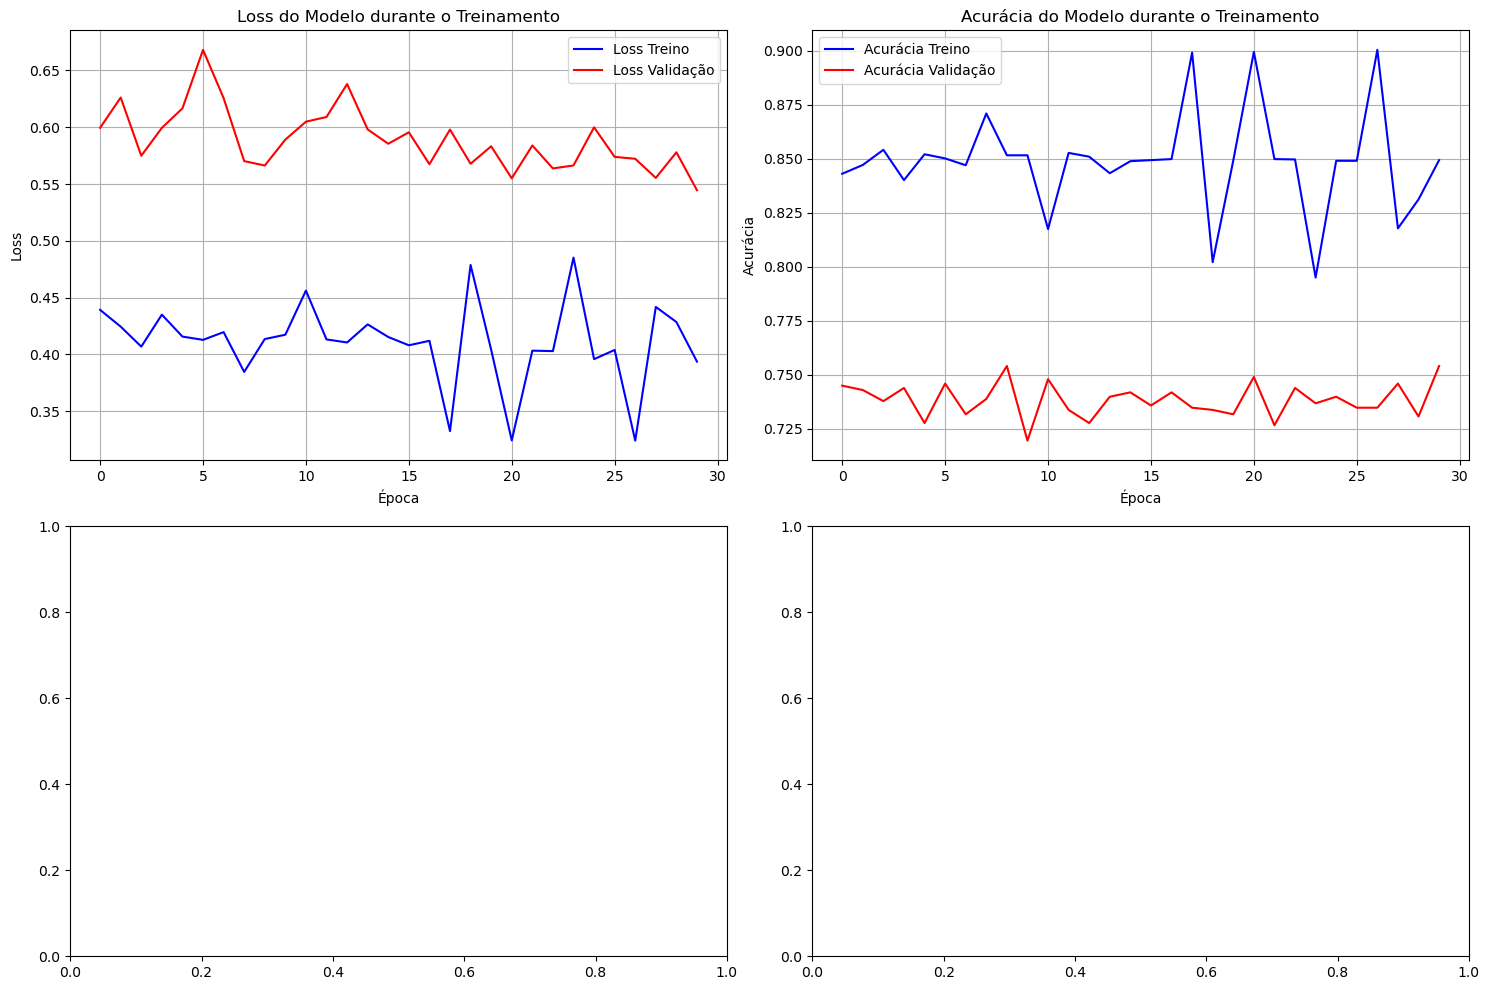


📊 RESUMO FINAL DO TREINAMENTO
🔧 Configurações utilizadas:
   • Threshold gaze->atenção: 25° (era 15°)
   • Threshold sequência: 0.6 (era 0.9)
   • Janelas não-sobrepostas: ✅
   • Balanceamento de classes: ✅
   • Batch size: 16
   • Total épocas executadas: 30

📈 Estatísticas dos dados:
   • Total de sequências: 5182
   • Amostras de treino: 3182
   • Amostras de validação: 1000

🎯 Resultados finais:
   • Loss final treino: 0.3937
   • Acurácia final treino: 0.8494
   • Loss final validação: 0.5445
   • Acurácia final validação: 0.7541

💾 Modelo salvo em: ../models/mpiigaze_attention_model_normalized.keras
✅ Use este modelo com o detector da webcam corrigido!


In [16]:
# --- 8. Salvar o modelo treinado ---
models_dir = os.path.join(CAMINHO_BASE, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Diretório criado: {models_dir}")

model.save(MODELO_SALVO)
print(f"\nModelo salvo em: {MODELO_SALVO}")

# --- 9. Visualização dos resultados ---
print("\nCriando gráficos de treinamento...")

# Verificar se temos dados de validação
has_validation = 'val_loss' in history.history

# Configurar subplot
if has_validation:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
else:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de Loss
ax1.plot(history.history['loss'], label='Loss Treino', color='blue')
if has_validation:
    ax1.plot(history.history['val_loss'], label='Loss Validação', color='red')
ax1.set_title('Loss do Modelo durante o Treinamento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Gráfico de Acurácia
ax2.plot(history.history['accuracy'], label='Acurácia Treino', color='blue')
if has_validation:
    ax2.plot(history.history['val_accuracy'], label='Acurácia Validação', color='red')
ax2.set_title('Acurácia do Modelo durante o Treinamento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')
ax2.legend()
ax2.grid(True)

if has_validation:
    # Gráfico de Precision
    if 'precision' in history.history:
        ax3.plot(history.history['precision'], label='Precision Treino', color='green')
        ax3.plot(history.history['val_precision'], label='Precision Validação', color='orange')
        ax3.set_title('Precision do Modelo durante o Treinamento')
        ax3.set_xlabel('Época')
        ax3.set_ylabel('Precision')
        ax3.legend()
        ax3.grid(True)

    # Gráfico de Recall
    if 'recall' in history.history:
        ax4.plot(history.history['recall'], label='Recall Treino', color='purple')
        ax4.plot(history.history['val_recall'], label='Recall Validação', color='brown')
        ax4.set_title('Recall do Modelo durante o Treinamento')
        ax4.set_xlabel('Época')
        ax4.set_ylabel('Recall')
        ax4.legend()
        ax4.grid(True)

plt.tight_layout()
plt.show()

# --- 10. Análise final ---
print("\n" + "="*80)
print("📊 RESUMO FINAL DO TREINAMENTO")
print("="*80)

print(f"🔧 Configurações utilizadas:")
print(f"   • Threshold gaze->atenção: 25° (era 15°)")
print(f"   • Threshold sequência: 0.6 (era 0.9)")
print(f"   • Janelas não-sobrepostas: ✅")
print(f"   • Balanceamento de classes: ✅")
print(f"   • Batch size: {batch_size}")
print(f"   • Total épocas executadas: {len(history.history['loss'])}")

print(f"\n📈 Estatísticas dos dados:")
print(f"   • Total de sequências: {sequence_count}")
print(f"   • Amostras de treino: {total_train_samples}")
print(f"   • Amostras de validação: {total_val_samples}")

print(f"\n🎯 Resultados finais:")
print(f"   • Loss final treino: {final_loss:.4f}")
print(f"   • Acurácia final treino: {final_acc:.4f}")

if has_validation:
    print(f"   • Loss final validação: {final_val_loss:.4f}")
    print(f"   • Acurácia final validação: {final_val_acc:.4f}")

print(f"\n💾 Modelo salvo em: {MODELO_SALVO}")
print(f"✅ Use este modelo com o detector da webcam corrigido!")
print("="*80)